In [4]:
import numpy as np
import pandas as pd
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import warnings
from copy import deepcopy
import matplotlib.pyplot as plt
from xgboost import plot_importance
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set_palette("cubehelix", 8)#"deep")
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from problem_creator import gen_regression_symbolic, gen_classification_symbolic
from scipy.stats import weightedtau
from sklearn.inspection import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.evaluate import feature_importance_permutation

In [28]:
datapoints = 2000
x0 = np.random.uniform(-1,1,datapoints)
x1 = np.random.uniform(-1,1,datapoints)
x2 = np.random.uniform(-1,1,datapoints)
#x3 = np.random.uniform(-1,1,datapoints)

x01 = x0*x1
x02 = x0*x2
x12 = x1*x2

y = x0 + x1 + x2 +x12#+ x01 #+ x02 + x12

# x0[1600:1800] = -x0[1600:1800]
# x1[1500:1700] = -x0[1500:1700]

for i in range(200):
    x1[i+1200] = x1[i+1200+1]# + i/2
x = np.array([x0,x1,x2]).T

In [29]:
model = xgb.XGBRegressor(gbtree='gbtree', objective='reg:linear').fit(x[:1000],y[:1000])
model.objective

[17:59:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'reg:linear'

In [30]:
loss_explainer = shap.TreeExplainer(model, x[1000:], feature_dependence="independent", model_output="logloss")
shap_loss_values = loss_explainer.shap_values(x[1000:],y[1000:])
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x[1000:])
#shap.monitoring_plot(0, shap_loss_values, x)

 96%|=================== | 955/1000 [00:15<00:00]       

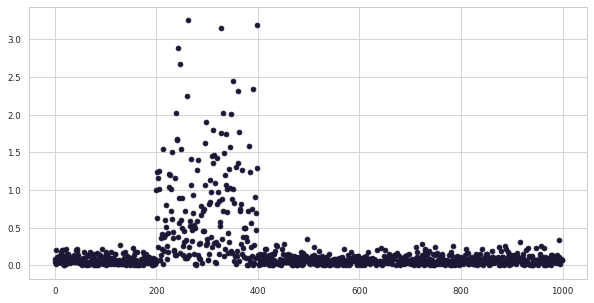

In [31]:
preds = model.predict(x[1000:])
error = np.absolute(preds -y[1000:])
plt.figure(figsize=(10,5))
plt.scatter(range(1000),error)

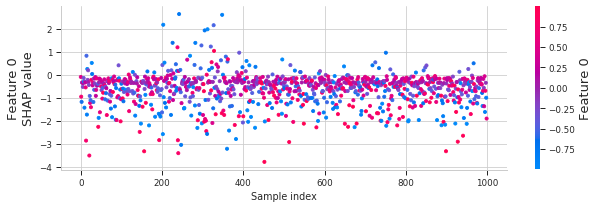

In [32]:
shap.monitoring_plot(0, shap_loss_values, x[1000:])

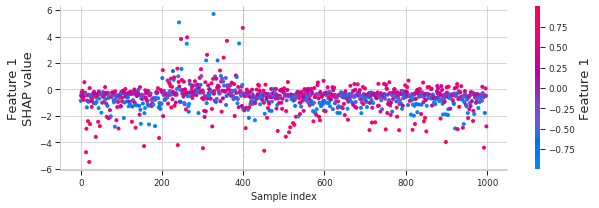

In [33]:
shap.monitoring_plot(1, shap_loss_values, x[1000:])

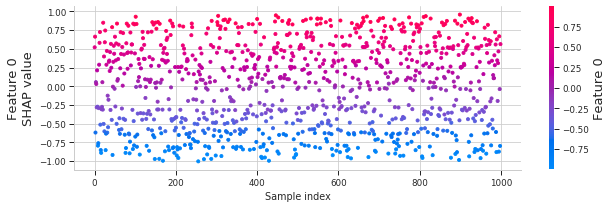

In [34]:
shap.monitoring_plot(0, shap_values, x[1000:])

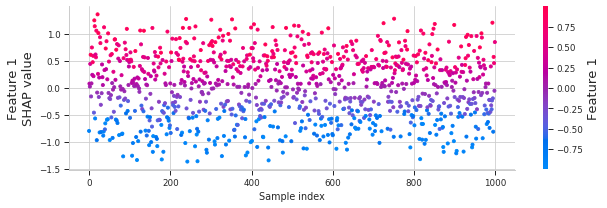

In [35]:
shap.monitoring_plot(1, shap_values, x[1000:])

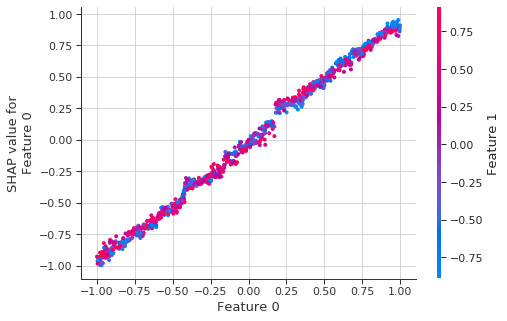

In [146]:
shap.dependence_plot(0,shap_values, x[1000:])

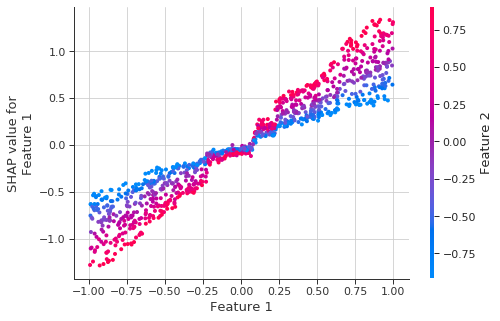

In [147]:
shap.dependence_plot(1,shap_values, x[1000:])